<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="./homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="./scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


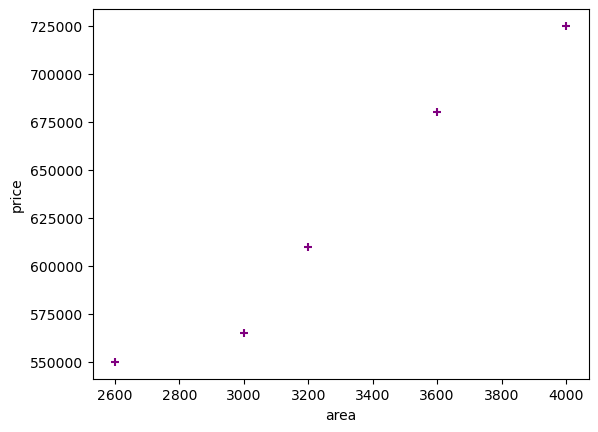

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price,color='purple', marker='+')

In [4]:
new_df = df.drop('price',axis='columns')
print(type(new_df))
print(new_df)

<class 'pandas.core.frame.DataFrame'>
   area
0  2600
1  3000
2  3200
3  3600
4  4000


In [5]:
price = df.price
# price = df.drop('area', axis=1)
print(type(price))
print(price)

<class 'pandas.core.series.Series'>
0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64


In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [7]:
reg.predict([[3300]])

/Users/shakil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
reg.coef_

array([135.78767123])

In [9]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [10]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [11]:
reg.predict([[5000]])

/Users/shakil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [12]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [13]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [14]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [15]:
area_df.to_csv("prediction.csv")

<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

### ________________________________________________________________

### Canda:- Lets Solve the cananda House price exercise here

41288.69409442

In [16]:
df = pd.read_csv("canada_per_capita_income.csv")

In [17]:
df.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [18]:
new_df = df.drop('per capita income (US$)', axis=1)
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [19]:
income = df['per capita income (US$)']
income

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

In [20]:
reg = linear_model.LinearRegression()
reg.fit(new_df,income)

LinearRegression()

In [21]:
reg.predict([[2008],[2009],[2010],[2011],[2012],[2020],[2021],[2022],[2023]])

/Users/shakil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31347.11319175, 32175.57826697, 33004.04334219, 33832.50841741,
       34660.97349264, 41288.69409442, 42117.15916964, 42945.62424486,
       43774.08932009])

In [22]:
print(reg.coef_)
print(reg.intercept_)

[828.46507522]
-1632210.7578554575


In [23]:
new_df.columns

Index(['year'], dtype='object')

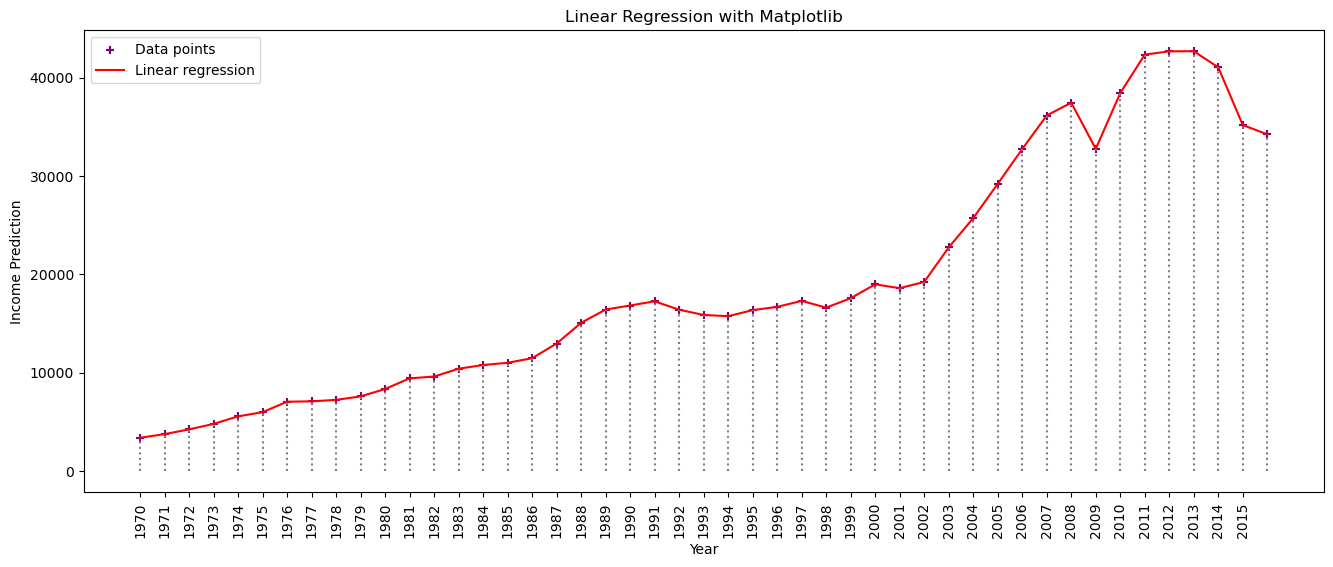

In [24]:
%matplotlib inline
plt.figure(figsize=(16, 6))  # 10 inches in width and 6 inches in height

plt.xlabel('Income')
plt.ylabel('Year')
plt.scatter(new_df, income,color='purple', marker='+',label='Data points')

plt.plot(new_df, income, color='red',label='Linear regression')
# plt.xticks(ticks=new_df['year'])
plt.xticks(ticks=range(new_df['year'].tolist()[0],new_df['year'].tolist()[-1],1))
plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Income Prediction')
plt.legend()

plt.title('Linear Regression with Matplotlib')

plt.vlines(new_df, 0, income, colors='gray', linestyles='dotted')


plt.show()
